## Imports

In [1]:
# Navigate to appropriate directory
import os
while os.path.split(os.getcwd())[1] != "data-challenge-kernel-methods":
    os.chdir("..")
    if os.getcwd() == "/":
        raise ValueError()

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from PIL import Image
from time import time
from tqdm import tqdm
import pickle
import networkx as nx

from molecules import Molecule

## Load training data

In [2]:
with open("data/training_data.pkl", "rb") as file:
    training_data = pickle.load(file)

with open("data/training_labels.pkl", "rb") as file:
    training_labels = pickle.load(file)

In [3]:
training_data = [Molecule(graph) for graph in training_data]

Index: 0 Label: 0


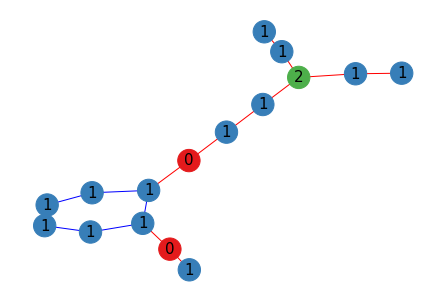

Index: 1 Label: 0


Index: 2 Label: 0


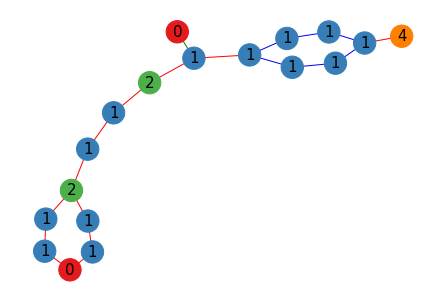

Index: 3 Label: 0


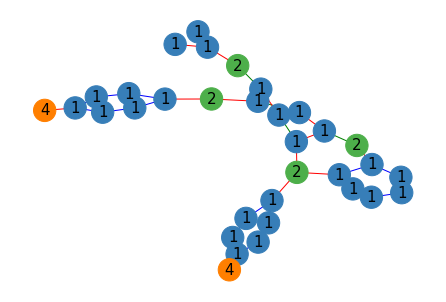

Index: 5 Label: 0


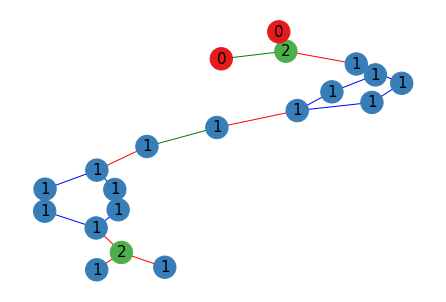

Index: 6 Label: 0


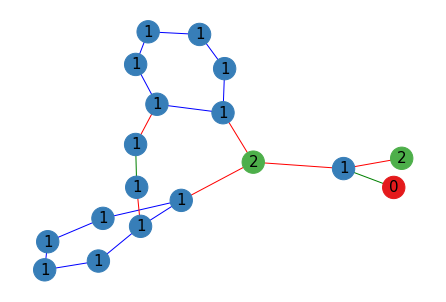

Index: 7 Label: 0


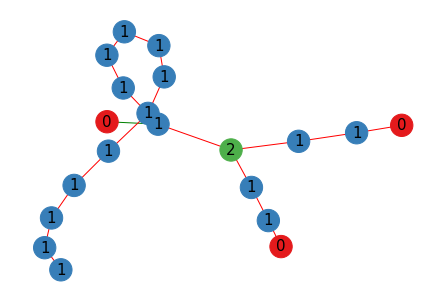

Index: 8 Label: 0


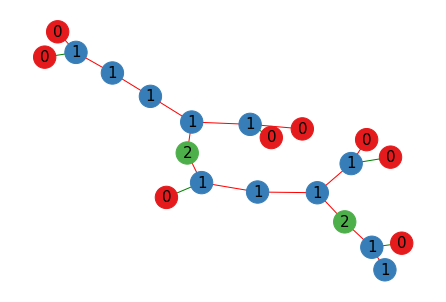

Index: 9 Label: 0


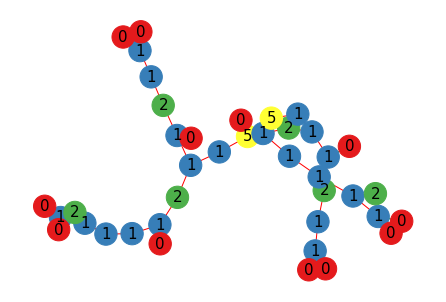

Index: 10 Label: 0


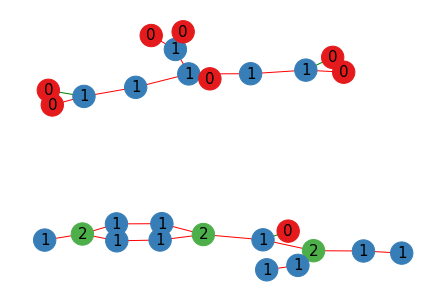

Index: 11 Label: 0


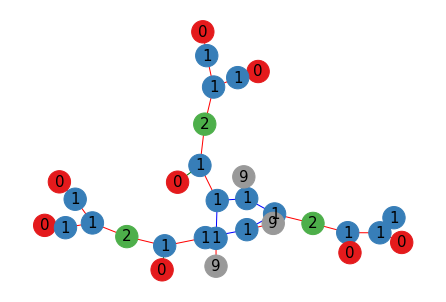

Index: 12 Label: 0


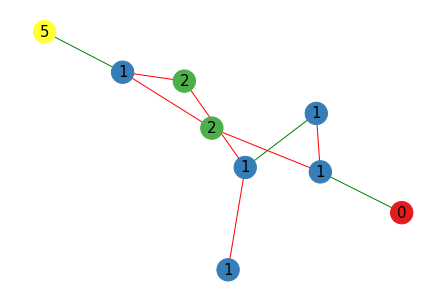

Index: 13 Label: 0


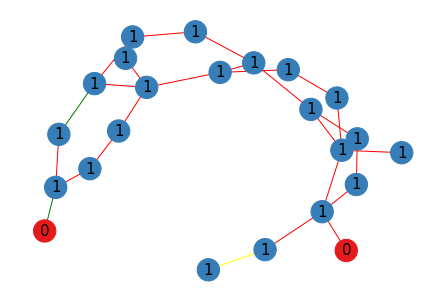

Index: 15 Label: 0


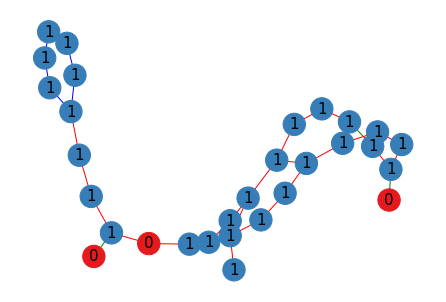

Index: 16 Label: 0


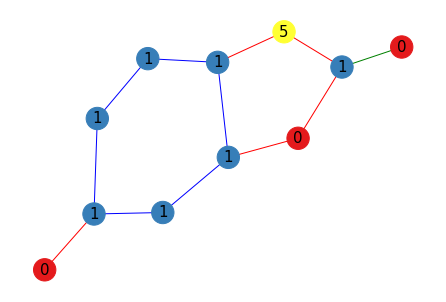

Index: 18 Label: 0


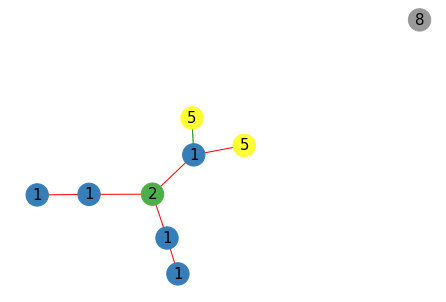

Index: 20 Label: 0


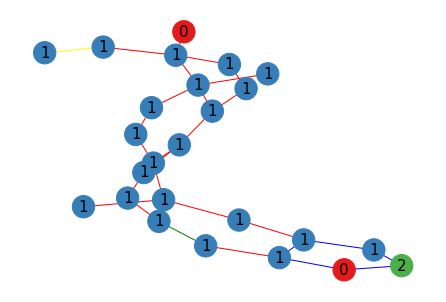

Index: 21 Label: 0


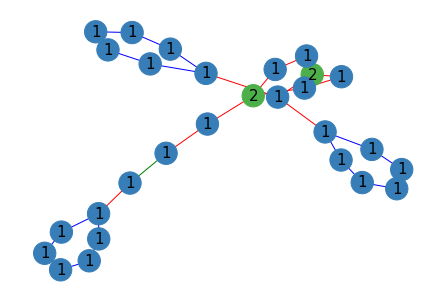

Index: 22 Label: 0


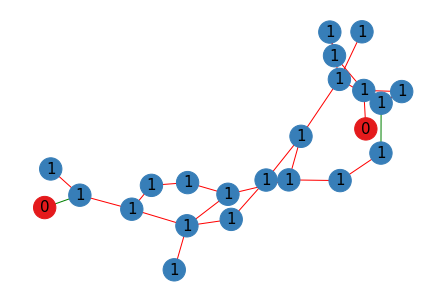

Index: 23 Label: 0


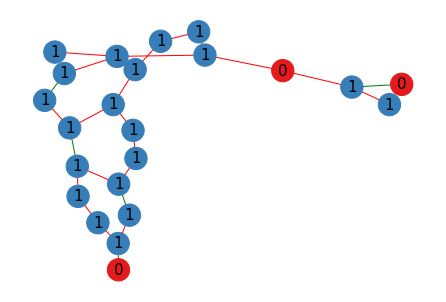

Index: 24 Label: 0


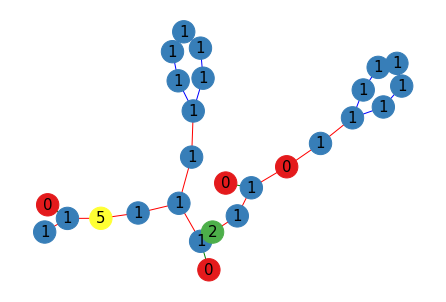

Index: 25 Label: 0


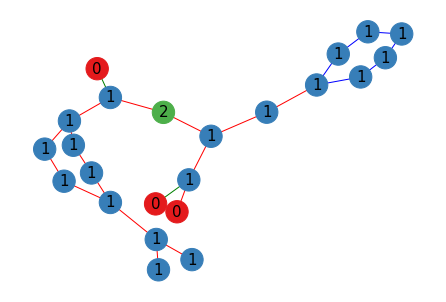

Index: 27 Label: 0


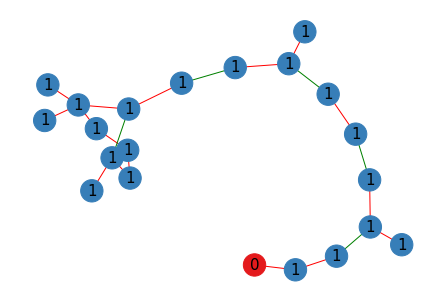

Index: 28 Label: 0


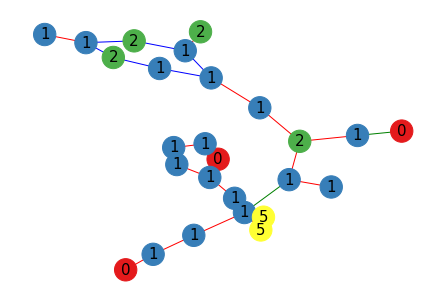

Index: 30 Label: 0


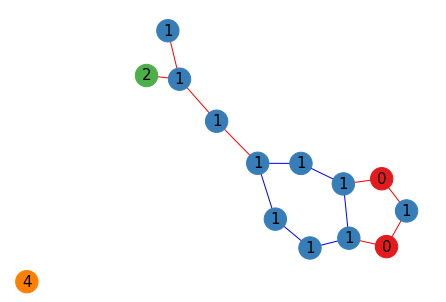

Index: 31 Label: 0


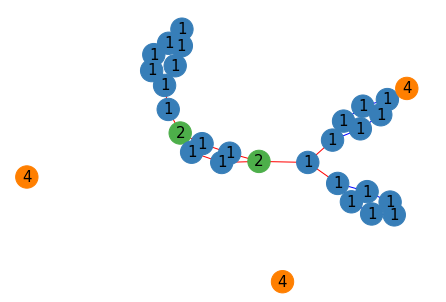

Index: 32 Label: 0


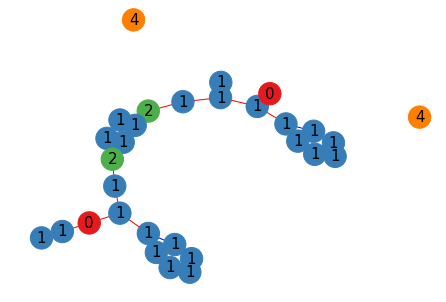

Index: 34 Label: 0


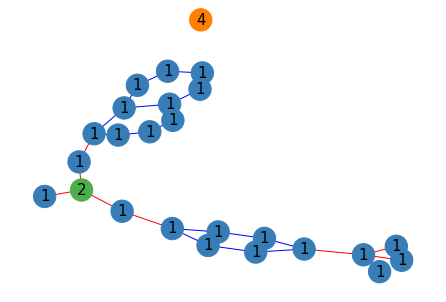

Index: 35 Label: 0


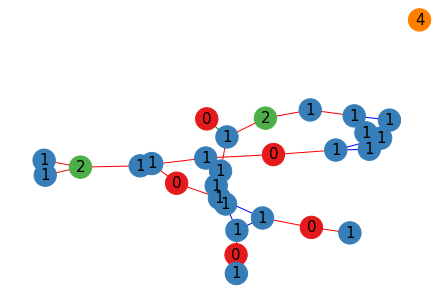

Index: 37 Label: 0


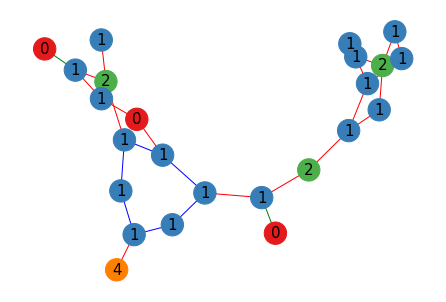

Index: 38 Label: 0


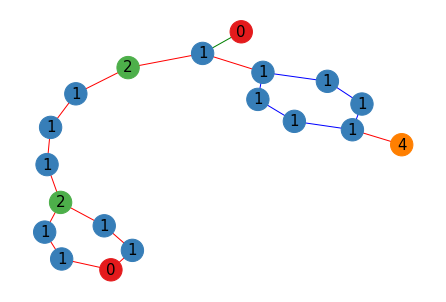

Index: 40 Label: 0


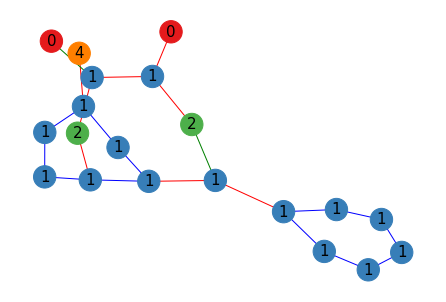

Index: 42 Label: 0


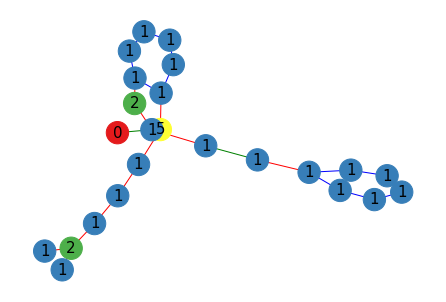

Index: 44 Label: 0


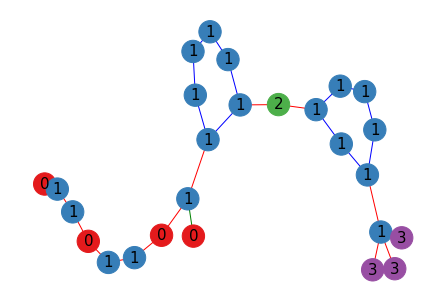

Index: 45 Label: 0


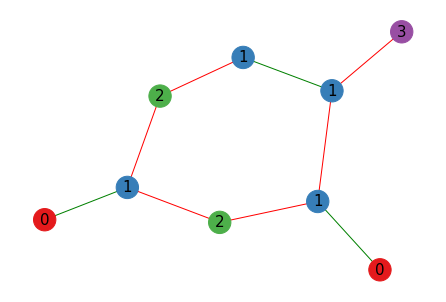

Index: 48 Label: 0


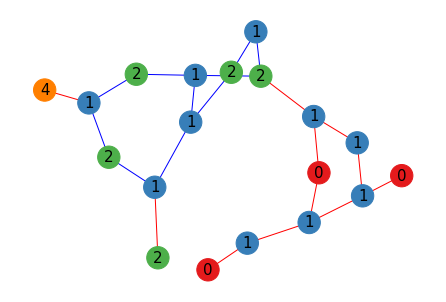

Index: 51 Label: 0


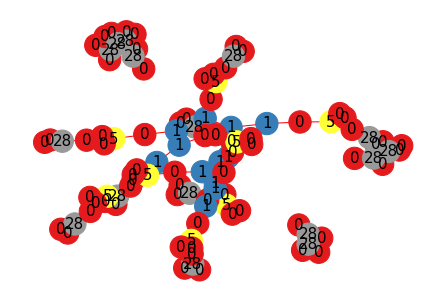

Index: 52 Label: 0


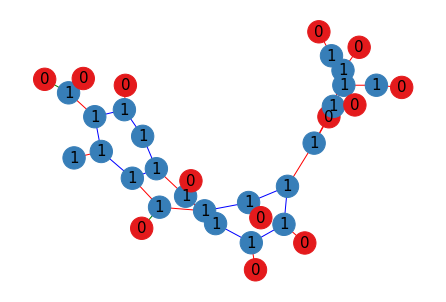

Index: 53 Label: 0


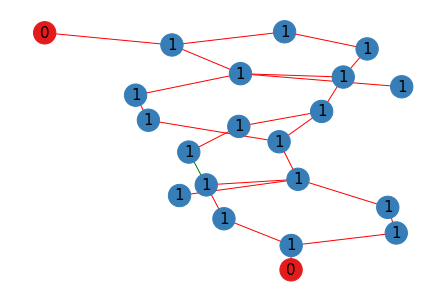

Index: 54 Label: 0


Index: 55 Label: 0


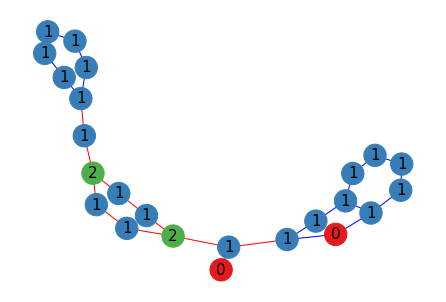

Index: 56 Label: 0


Index: 58 Label: 0


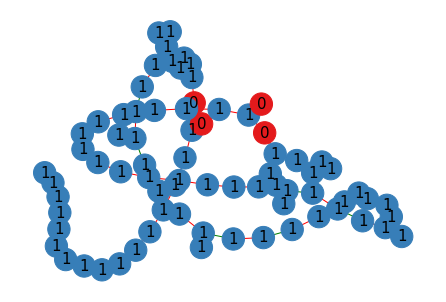

Index: 60 Label: 0


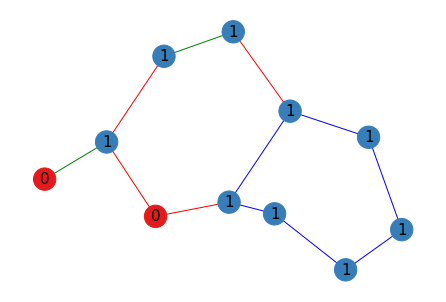

Index: 61 Label: 0


Index: 62 Label: 0


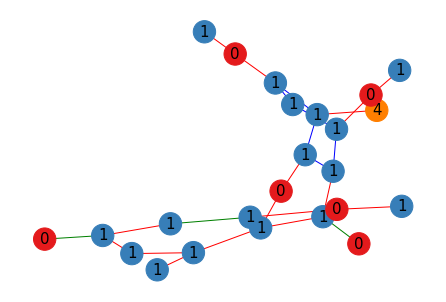

Index: 64 Label: 0


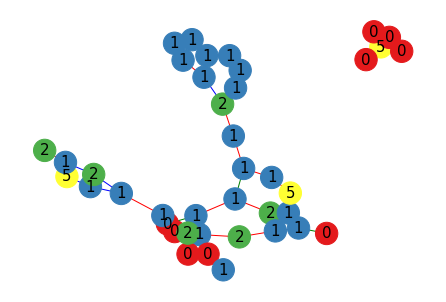

Index: 65 Label: 0


Index: 66 Label: 0


Index: 68 Label: 0


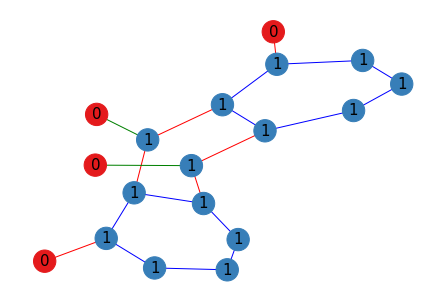

Index: 69 Label: 0


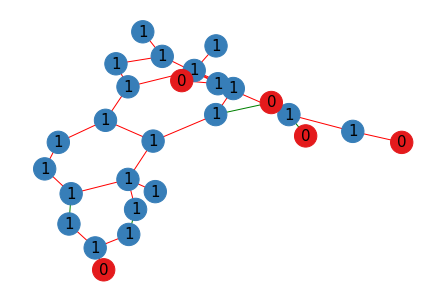

Index: 70 Label: 0


Index: 71 Label: 0


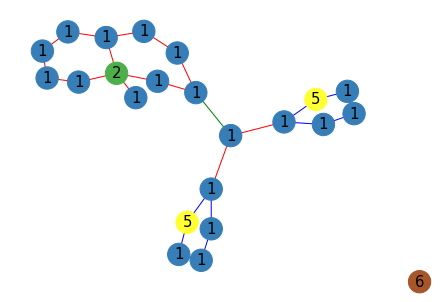

Index: 72 Label: 0


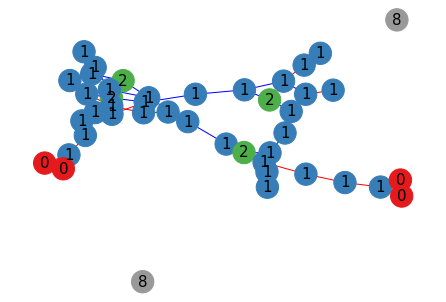

Index: 74 Label: 0


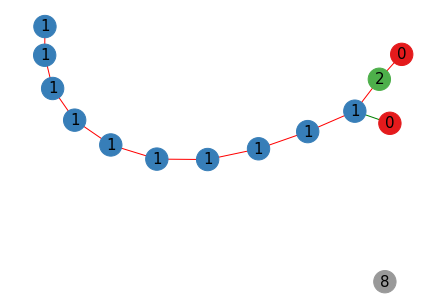

Index: 75 Label: 0


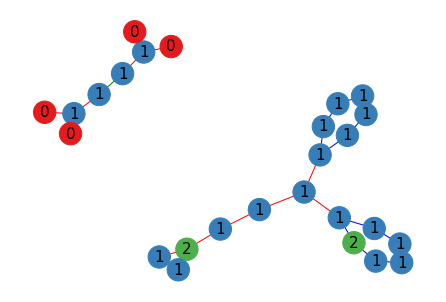

Index: 76 Label: 0


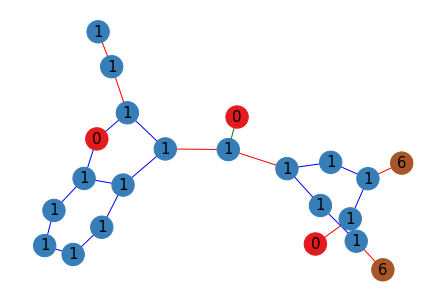

Index: 79 Label: 0


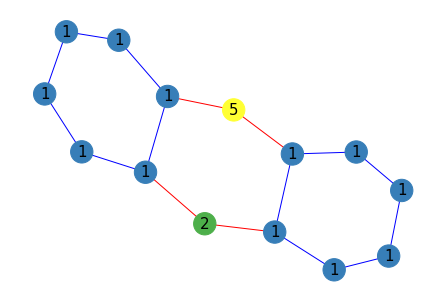

Index: 80 Label: 0


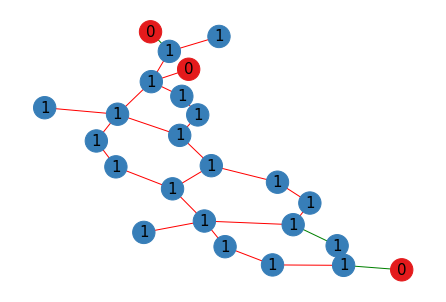

Index: 81 Label: 0


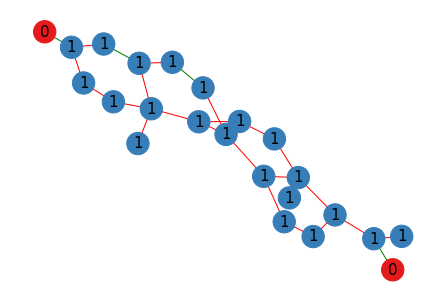

Index: 82 Label: 0


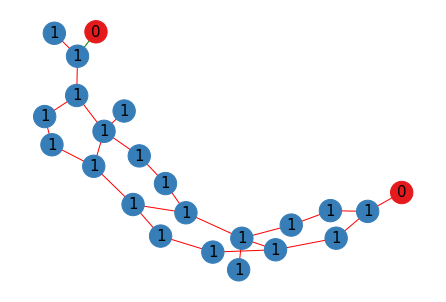

Index: 83 Label: 0


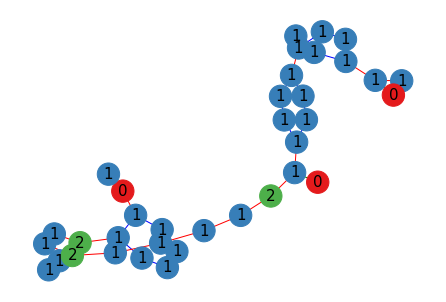

Index: 84 Label: 0


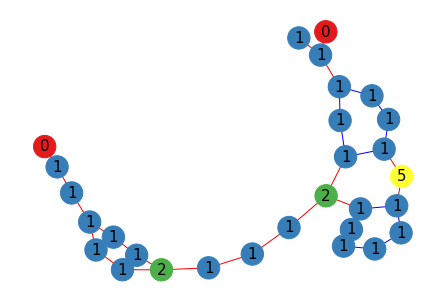

Index: 85 Label: 0


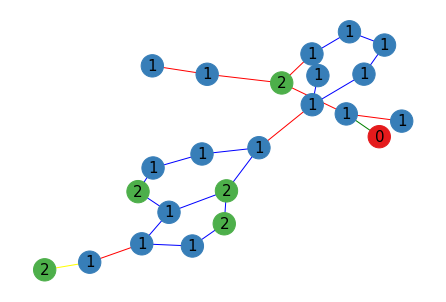

Index: 86 Label: 0


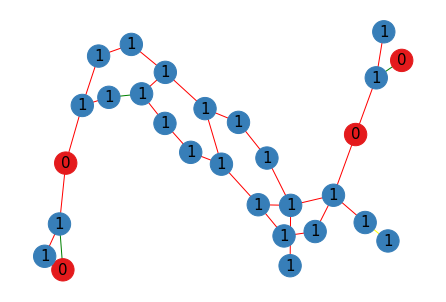

Index: 87 Label: 0


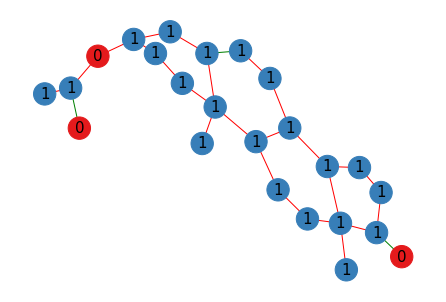

Index: 88 Label: 0


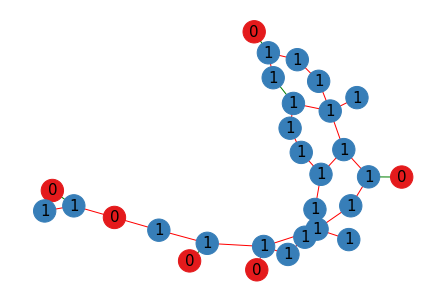

Index: 89 Label: 0


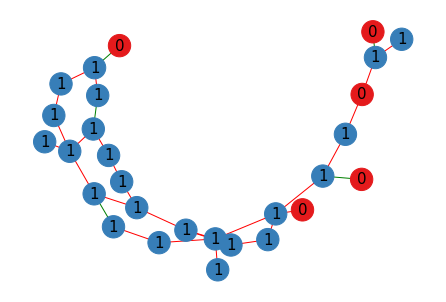

Index: 90 Label: 0


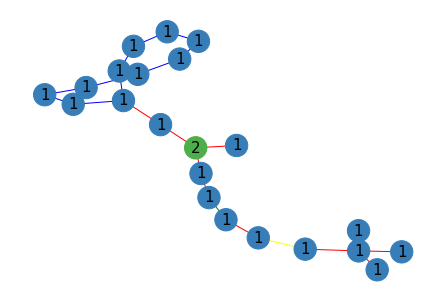

Index: 92 Label: 0


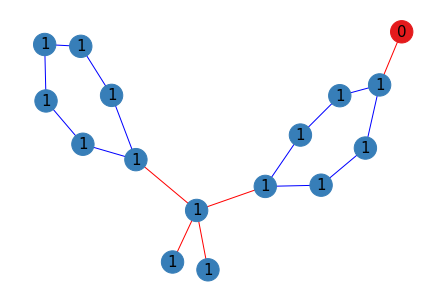

Index: 93 Label: 0


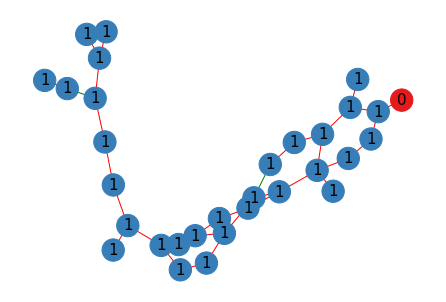

Index: 94 Label: 0


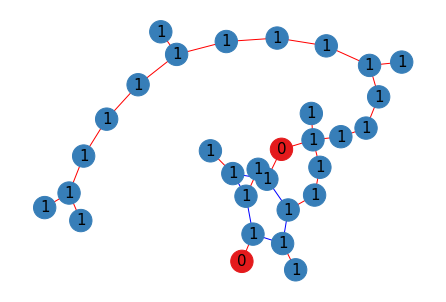

Index: 95 Label: 0


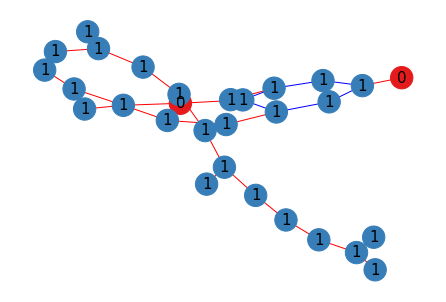

Index: 96 Label: 0


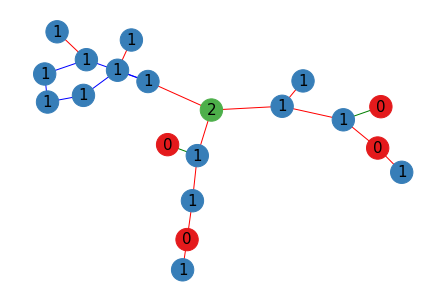

Index: 97 Label: 0


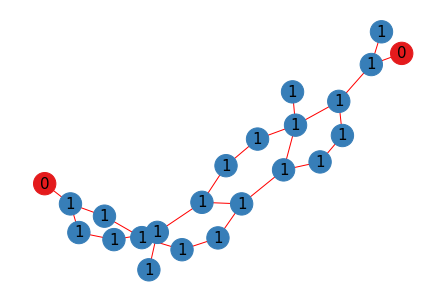

Index: 98 Label: 0


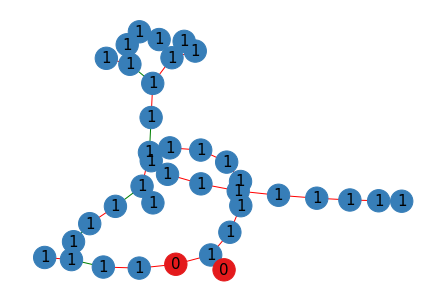

Index: 99 Label: 0


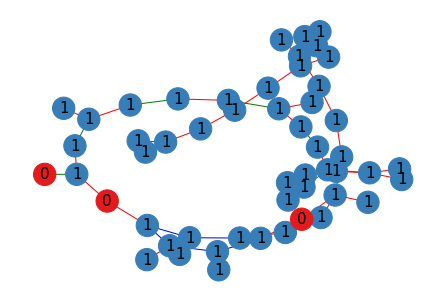

Index: 101 Label: 0


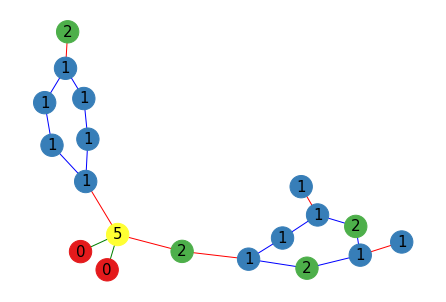

Index: 103 Label: 0


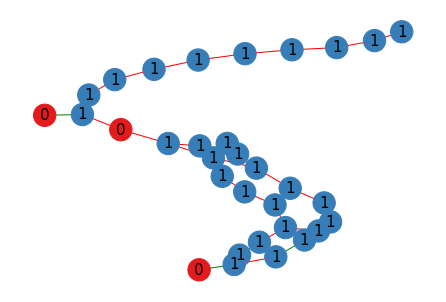

Index: 104 Label: 0


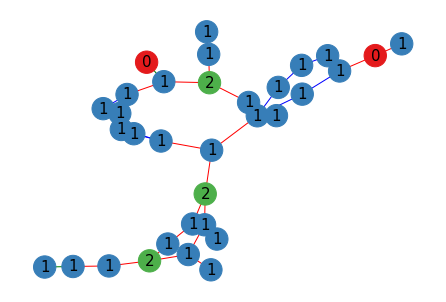

Index: 105 Label: 0


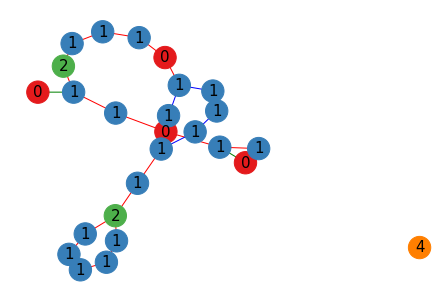

Index: 106 Label: 0


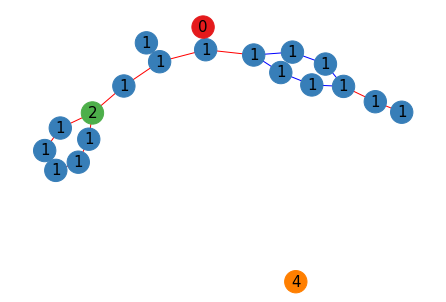

Index: 107 Label: 0


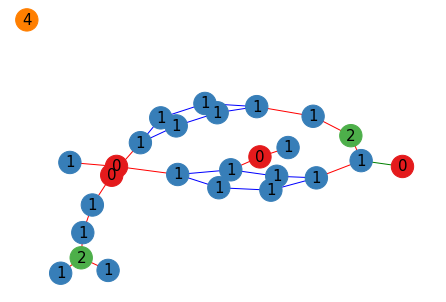

Index: 108 Label: 0


Index: 109 Label: 0


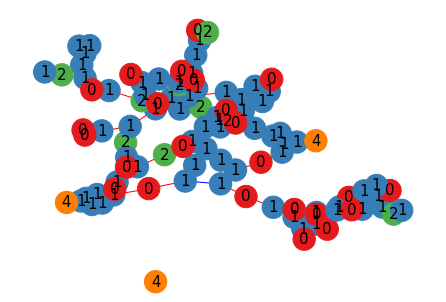

Index: 110 Label: 0


Index: 111 Label: 0


Index: 112 Label: 0


Index: 113 Label: 0


Index: 114 Label: 0


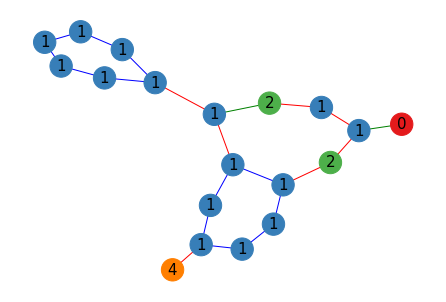

Index: 115 Label: 0


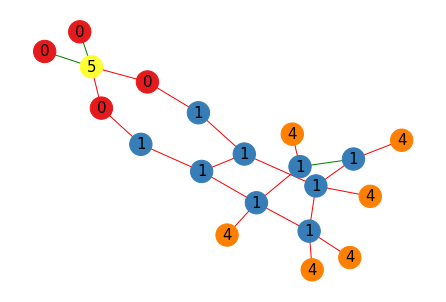

Index: 116 Label: 0


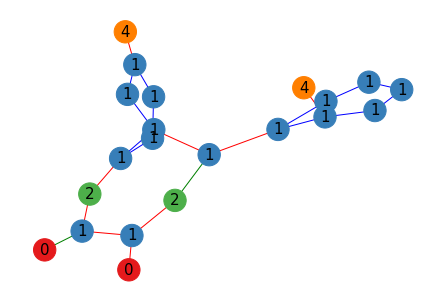

Index: 117 Label: 0


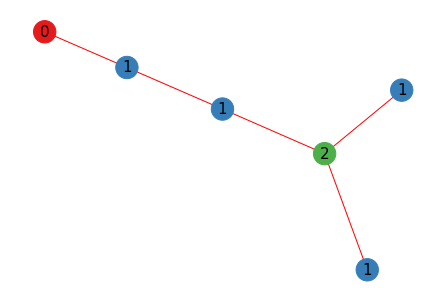

Index: 118 Label: 0


Index: 119 Label: 0


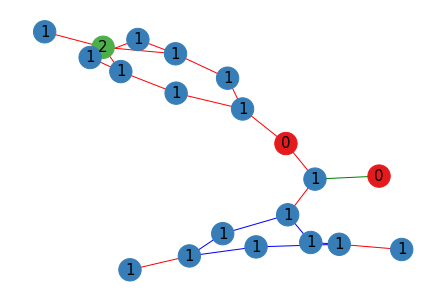

Index: 120 Label: 0


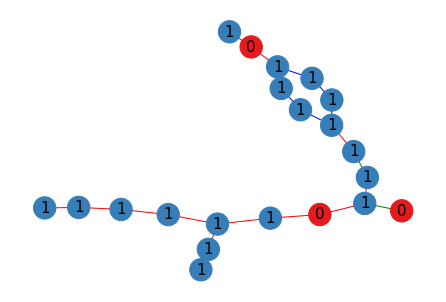

Index: 122 Label: 0


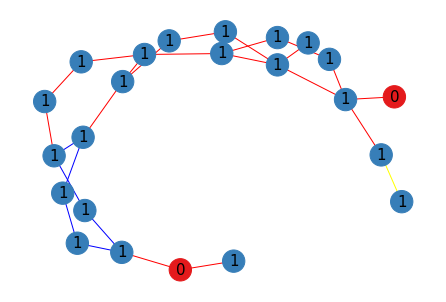

Index: 123 Label: 0


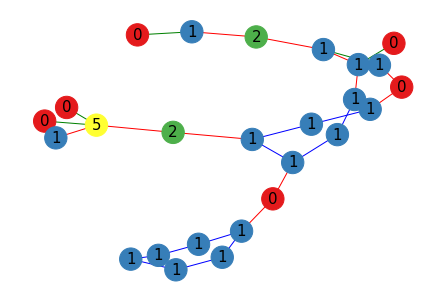

Index: 124 Label: 0


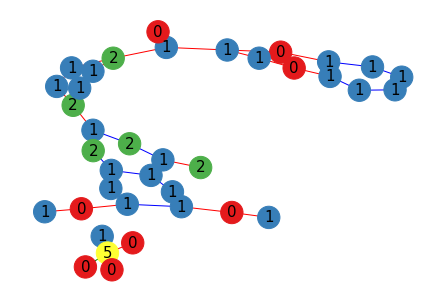

Index: 125 Label: 0


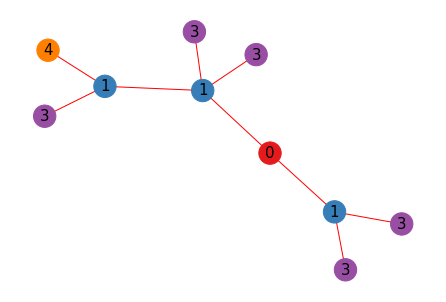

Index: 126 Label: 0


Index: 127 Label: 0


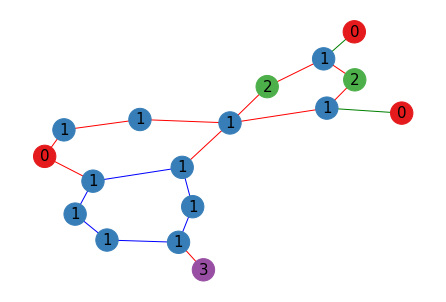

Index: 128 Label: 0


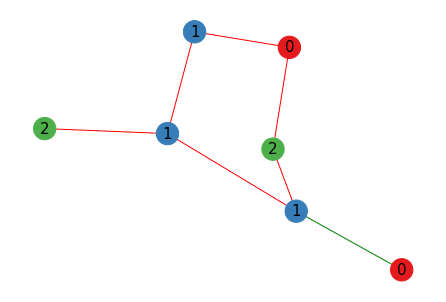

Index: 129 Label: 0


Index: 130 Label: 0


Index: 131 Label: 0


Index: 134 Label: 0


Index: 135 Label: 0


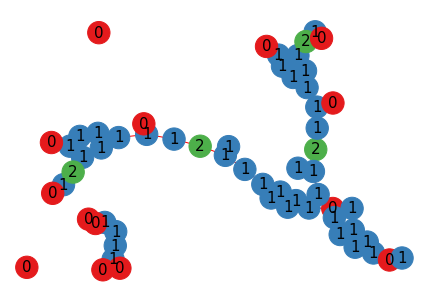

Index: 136 Label: 0


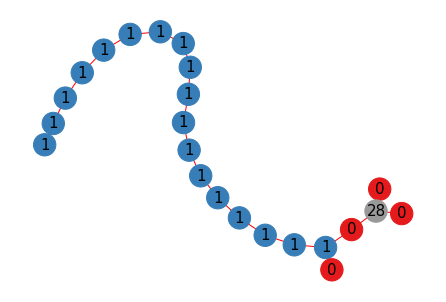

Index: 137 Label: 0


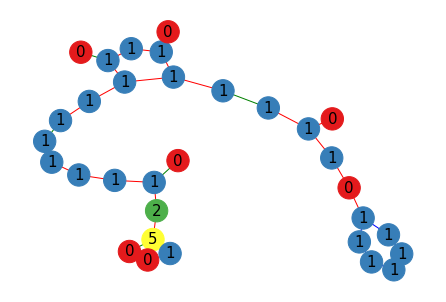

Index: 138 Label: 0


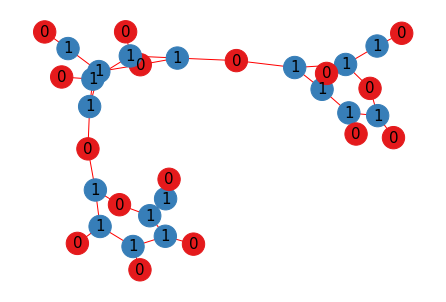

Index: 139 Label: 0


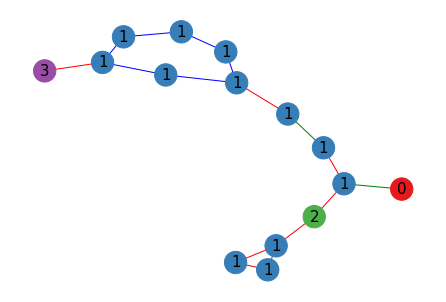

Index: 140 Label: 0


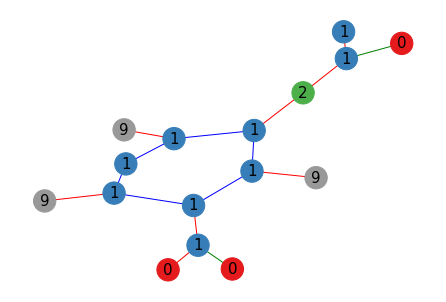

Index: 141 Label: 0


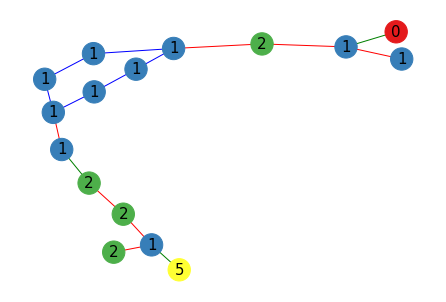

Index: 142 Label: 0


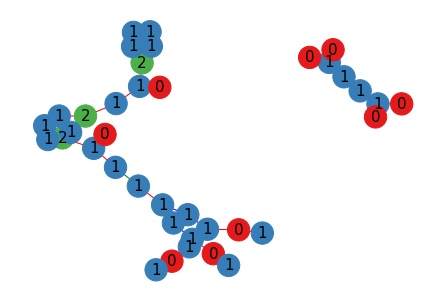

Index: 143 Label: 0


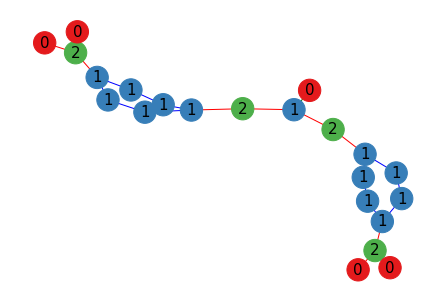

Index: 144 Label: 0


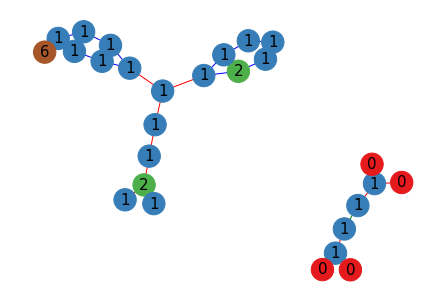

Index: 145 Label: 0


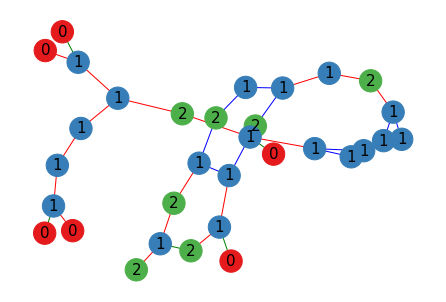

Index: 146 Label: 0


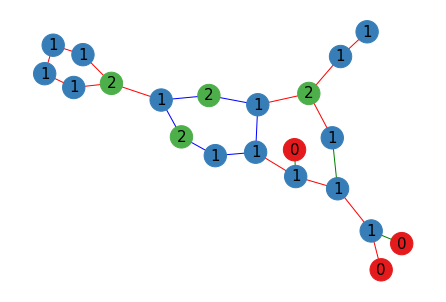

Index: 147 Label: 0


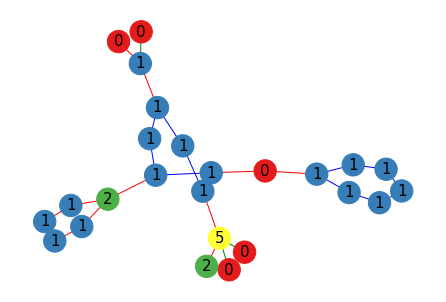

Index: 148 Label: 0


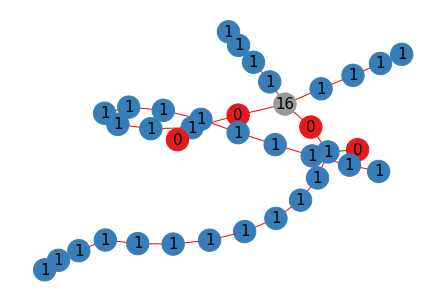

Index: 150 Label: 0


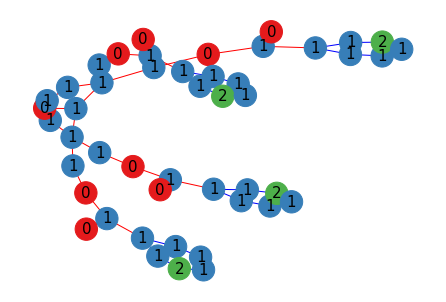

Index: 151 Label: 0


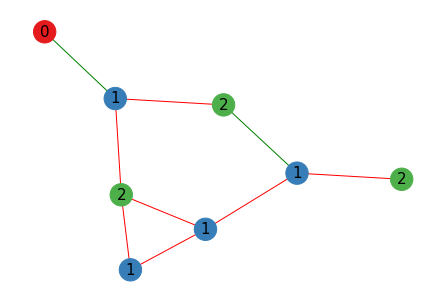

Index: 152 Label: 0


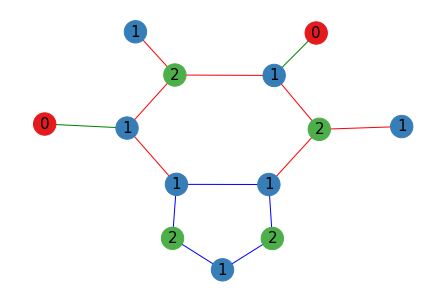

Index: 153 Label: 0


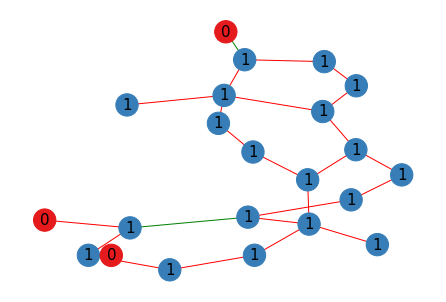

Index: 154 Label: 0


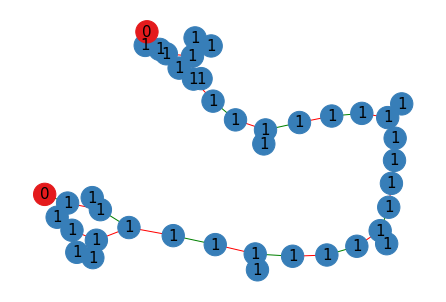

Index: 156 Label: 0


Index: 157 Label: 0


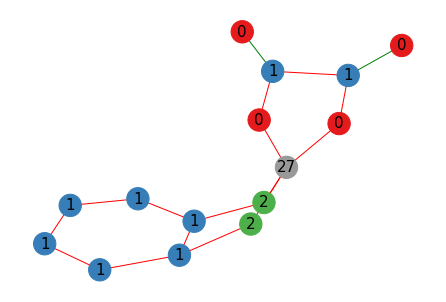

Index: 158 Label: 0


Index: 159 Label: 0


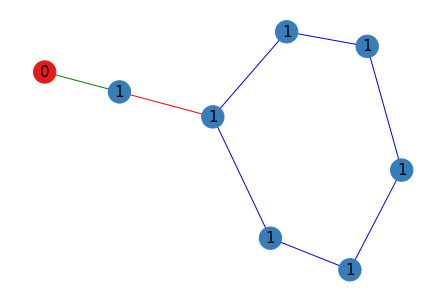

Index: 160 Label: 0


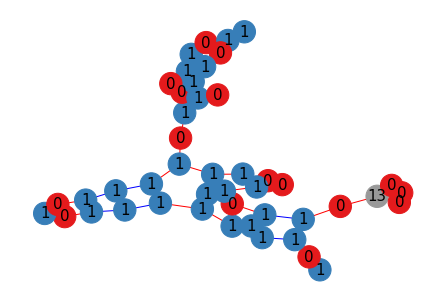

Index: 161 Label: 0


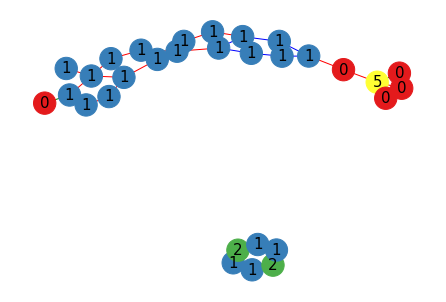

Index: 162 Label: 0


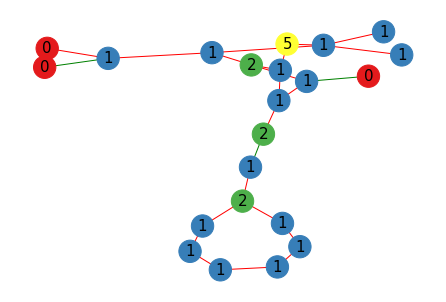

Index: 163 Label: 0


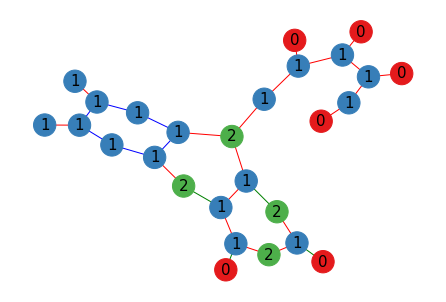

Index: 164 Label: 0


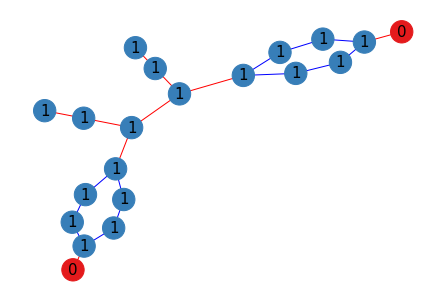

Index: 165 Label: 0


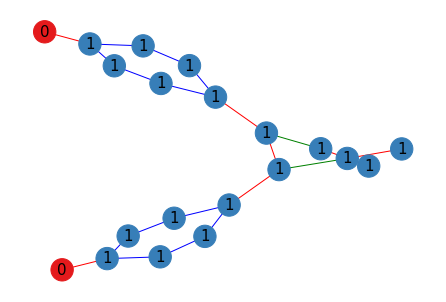

Index: 166 Label: 0


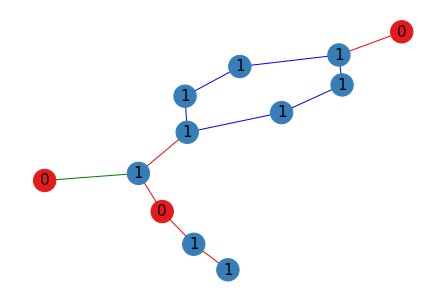

Index: 167 Label: 0


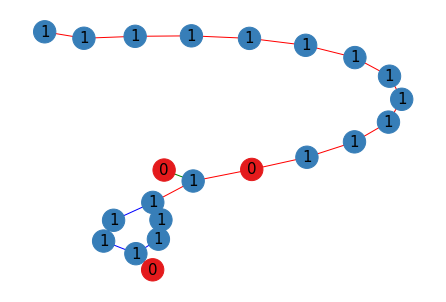

Index: 168 Label: 0


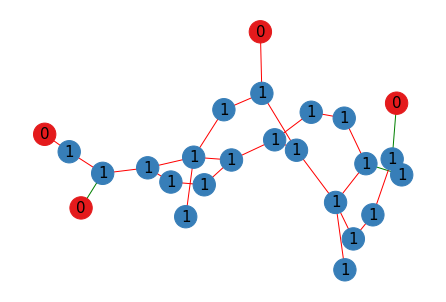

Index: 169 Label: 0


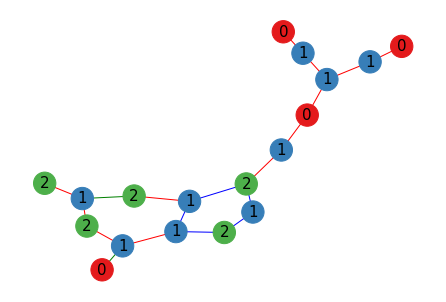

Index: 170 Label: 0


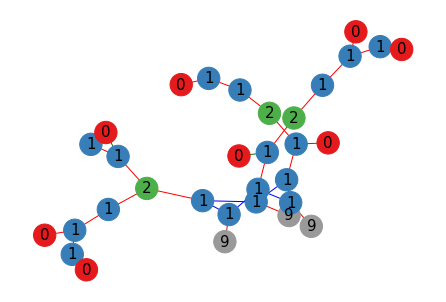

Index: 172 Label: 0


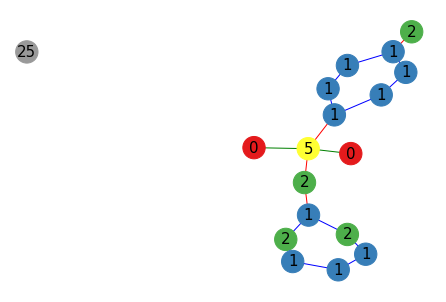

Index: 173 Label: 0


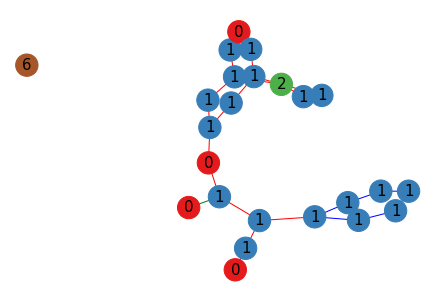

Index: 174 Label: 0


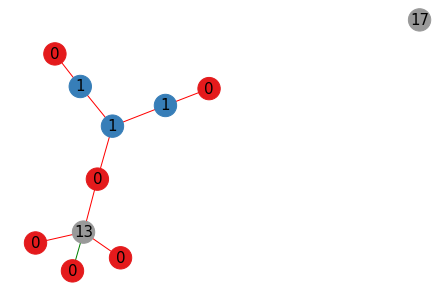

Index: 175 Label: 0


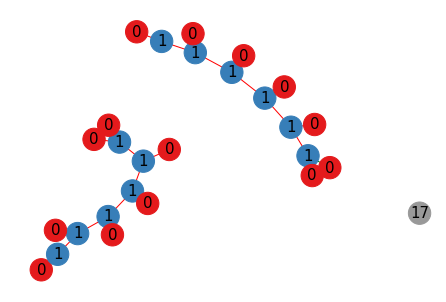

Index: 176 Label: 0


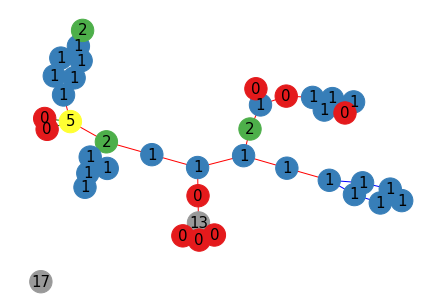

Index: 177 Label: 0


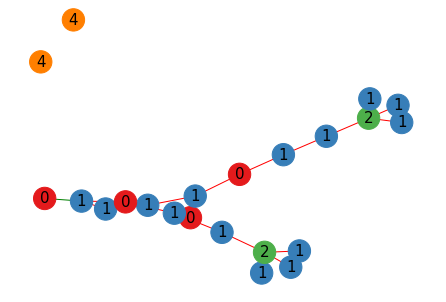

Index: 178 Label: 0


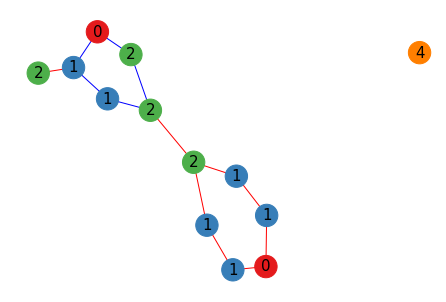

Index: 179 Label: 0


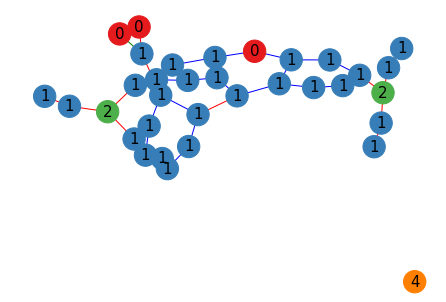

Index: 180 Label: 0


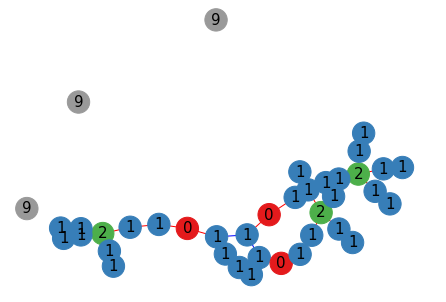

Index: 181 Label: 0


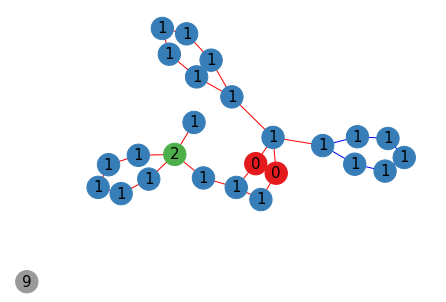

Index: 182 Label: 0


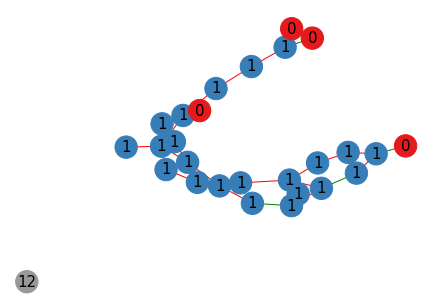

Index: 183 Label: 0


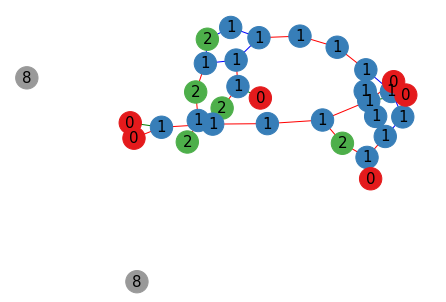

Index: 184 Label: 0


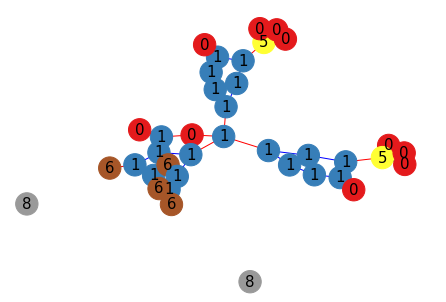

Index: 186 Label: 0


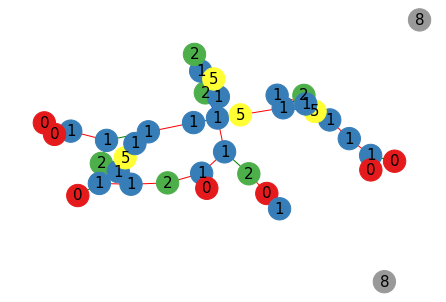

Index: 188 Label: 0


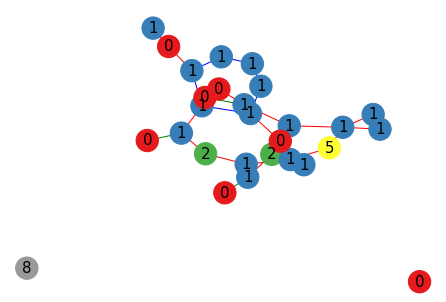

Index: 189 Label: 0


Index: 190 Label: 0


Index: 191 Label: 0


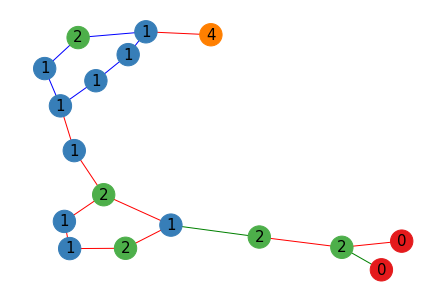

Index: 192 Label: 0


Index: 194 Label: 0


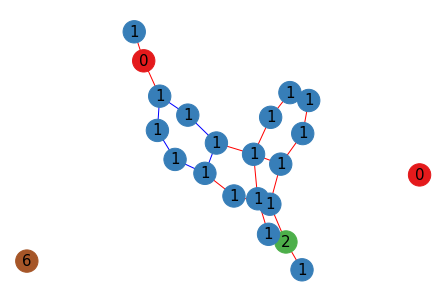

Index: 195 Label: 0


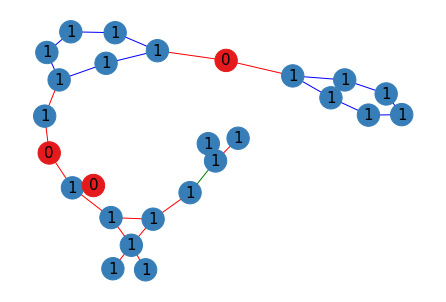

Index: 196 Label: 0


Index: 198 Label: 0


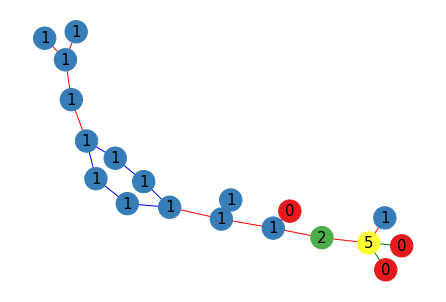

Index: 199 Label: 0


In [4]:
for i in range(200):
    if training_labels[i] == 0:
        print("Index:", i, "Label:", training_labels[i])
        training_data[i].plot()

Index: 4 Label: 1


Index: 14 Label: 1


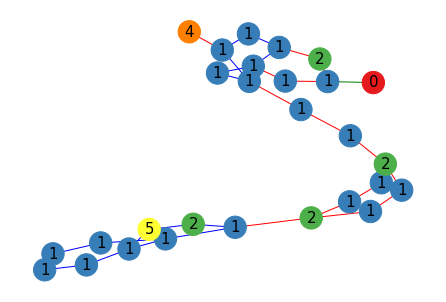

Index: 17 Label: 1


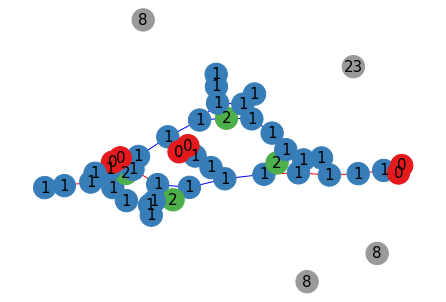

Index: 19 Label: 1


Index: 26 Label: 1


Index: 29 Label: 1


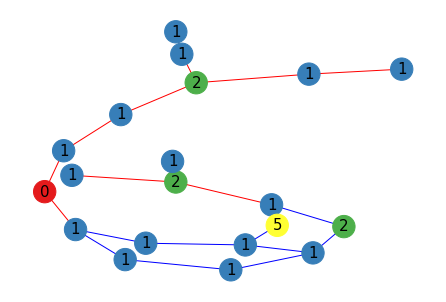

Index: 33 Label: 1


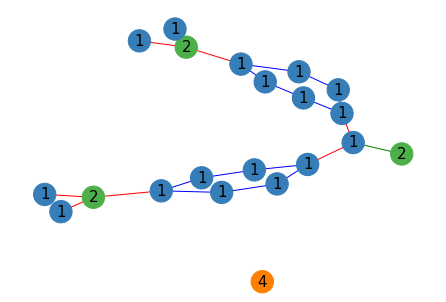

Index: 36 Label: 1


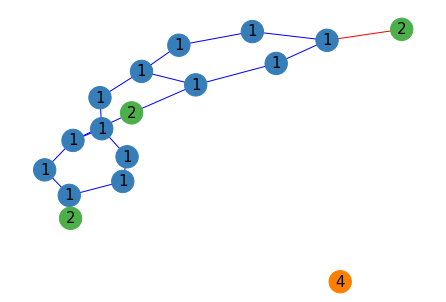

Index: 39 Label: 1


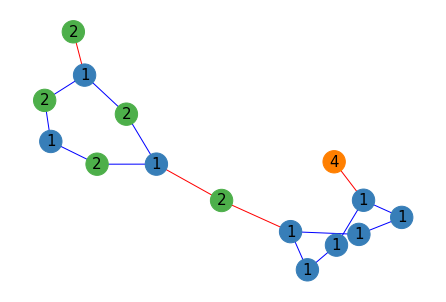

Index: 41 Label: 1


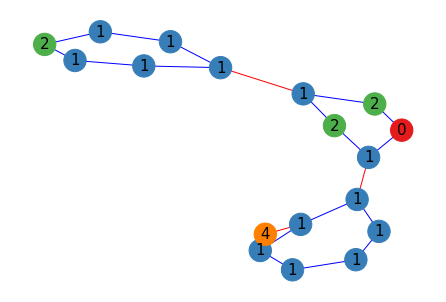

Index: 43 Label: 1


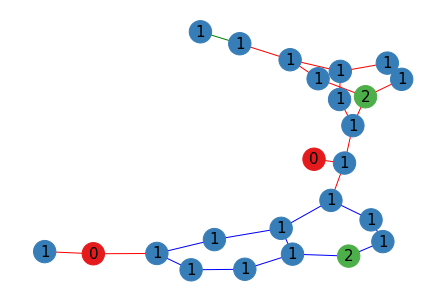

Index: 46 Label: 1


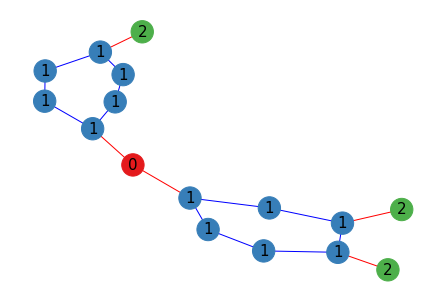

Index: 47 Label: 1


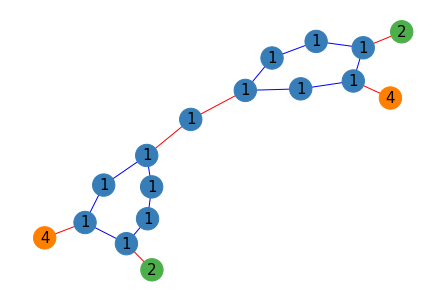

Index: 49 Label: 1


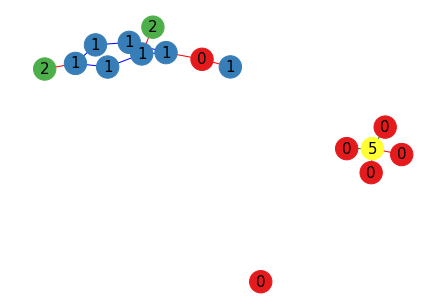

Index: 50 Label: 1


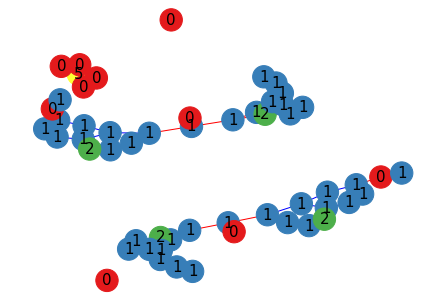

Index: 57 Label: 1


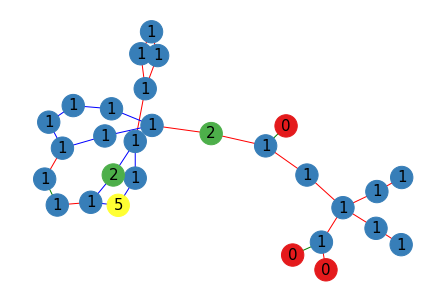

Index: 59 Label: 1


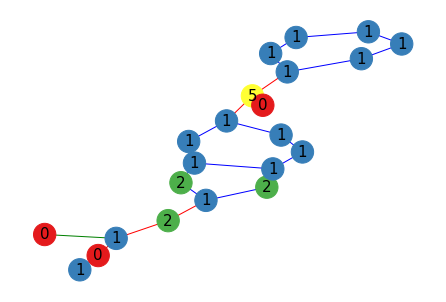

Index: 63 Label: 1


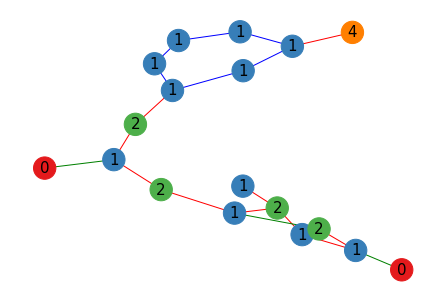

Index: 67 Label: 1


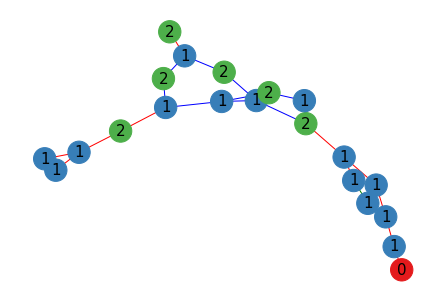

Index: 73 Label: 1


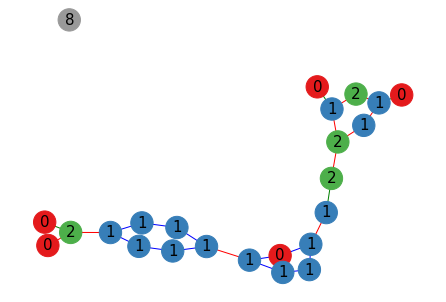

Index: 77 Label: 1


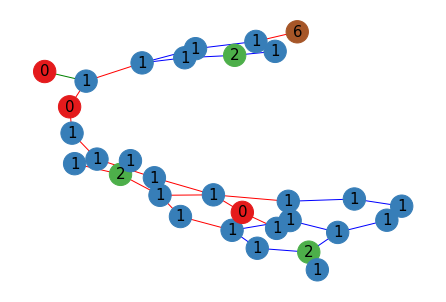

Index: 78 Label: 1


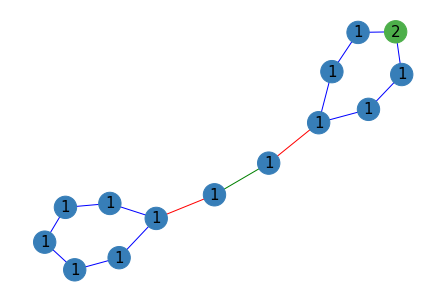

Index: 91 Label: 1


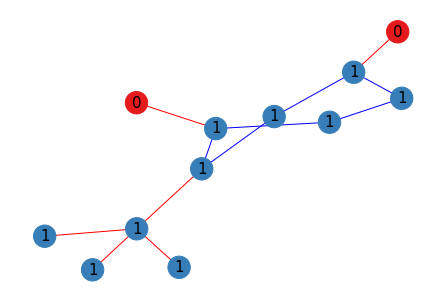

Index: 100 Label: 1


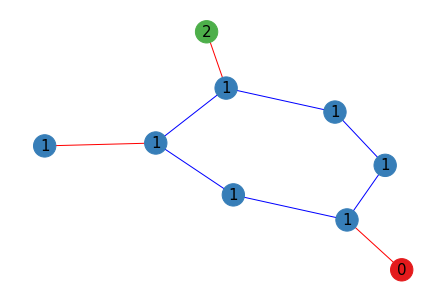

Index: 102 Label: 1


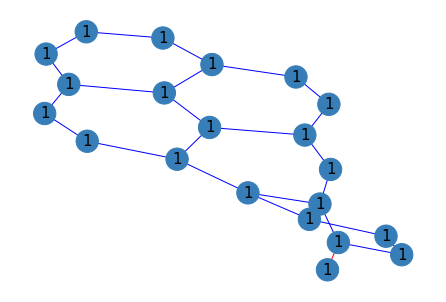

Index: 121 Label: 1


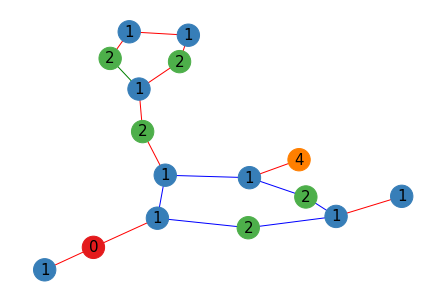

Index: 132 Label: 1


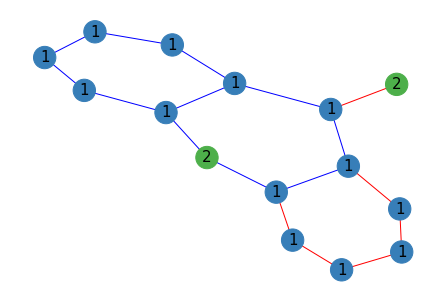

Index: 133 Label: 1


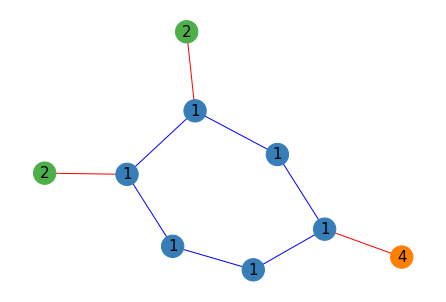

Index: 149 Label: 1


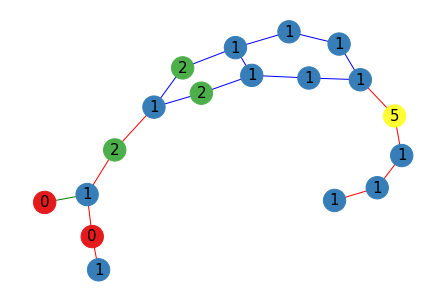

Index: 155 Label: 1


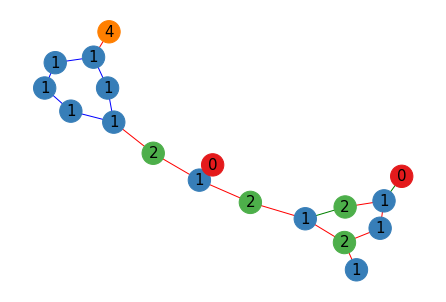

Index: 171 Label: 1


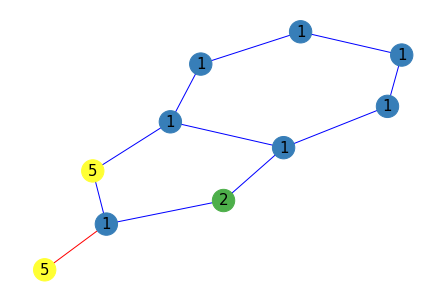

Index: 185 Label: 1


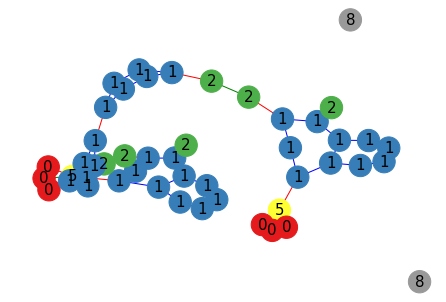

Index: 187 Label: 1


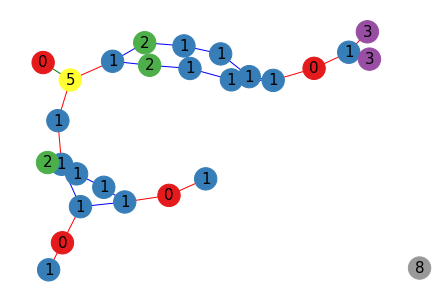

Index: 193 Label: 1


Index: 197 Label: 1


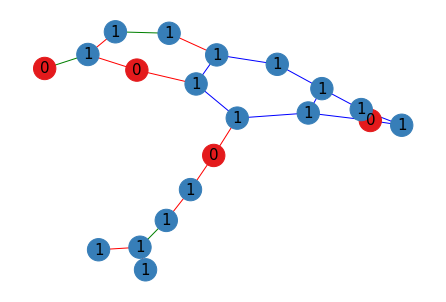

Index: 206 Label: 1


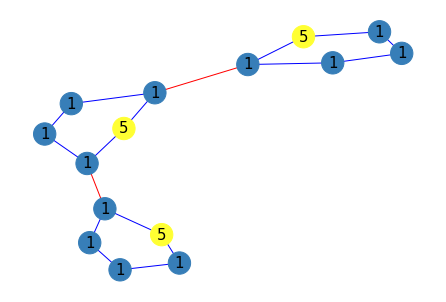

Index: 238 Label: 1


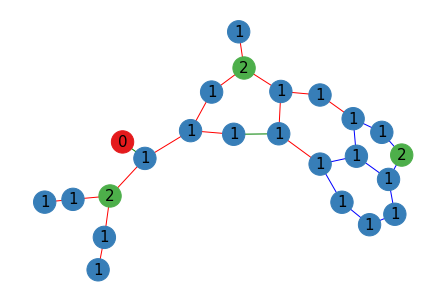

Index: 246 Label: 1


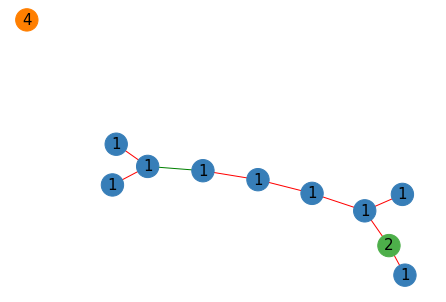

Index: 249 Label: 1


Index: 251 Label: 1


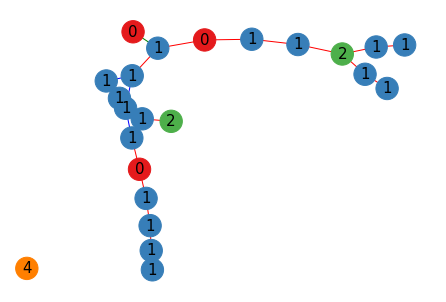

Index: 252 Label: 1


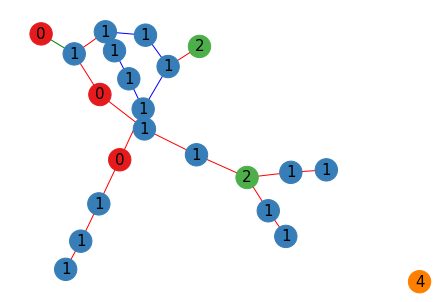

Index: 254 Label: 1


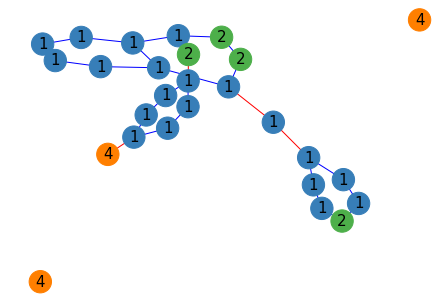

Index: 279 Label: 1


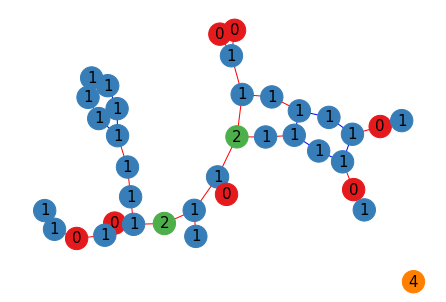

Index: 294 Label: 1


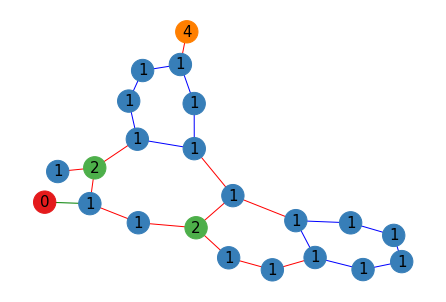

Index: 299 Label: 1


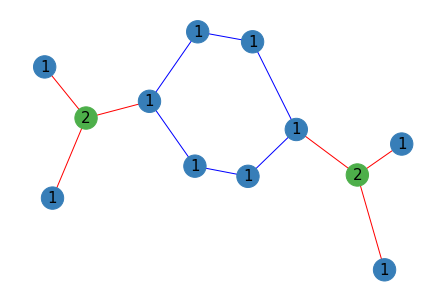

Index: 300 Label: 1


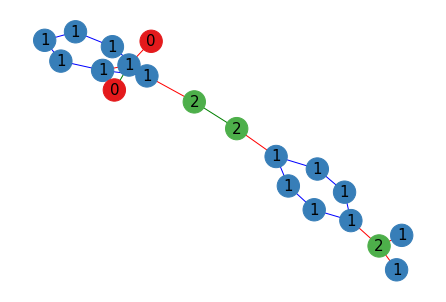

Index: 333 Label: 1


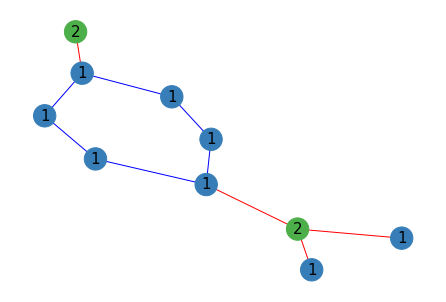

Index: 335 Label: 1


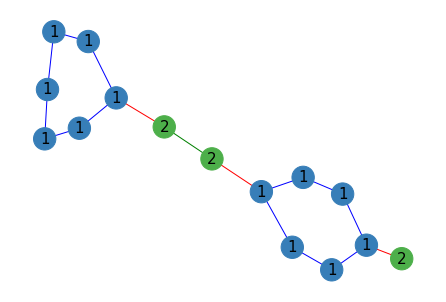

Index: 340 Label: 1


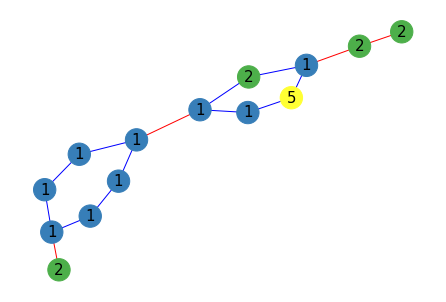

Index: 344 Label: 1


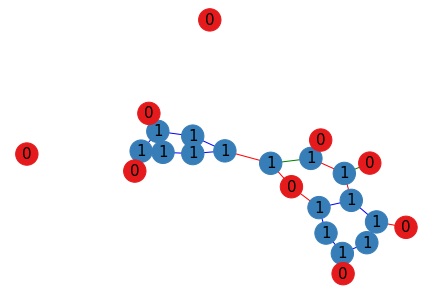

Index: 345 Label: 1


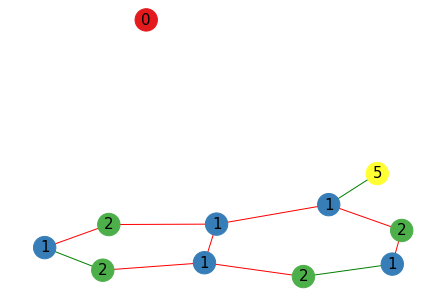

Index: 361 Label: 1


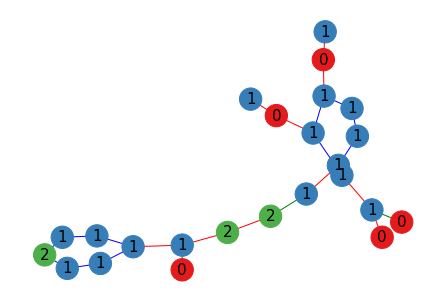

Index: 365 Label: 1


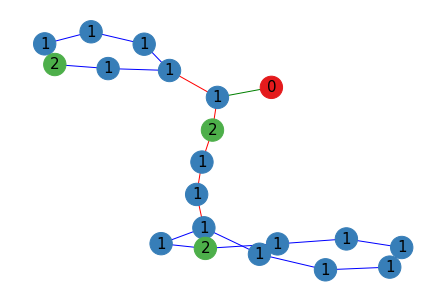

Index: 385 Label: 1


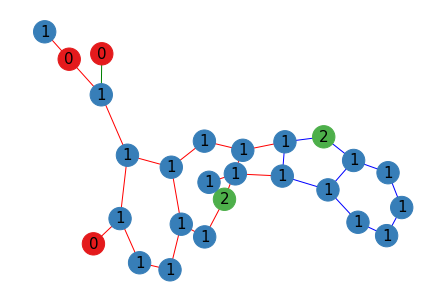

Index: 434 Label: 1


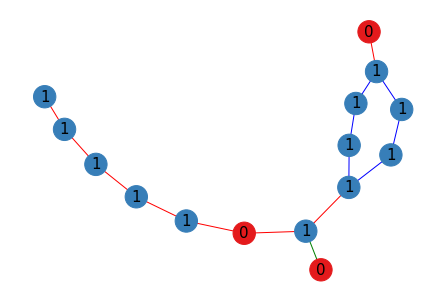

Index: 437 Label: 1


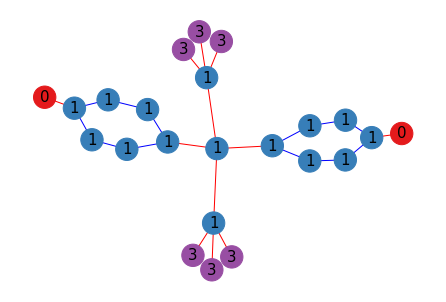

Index: 439 Label: 1


Index: 448 Label: 1


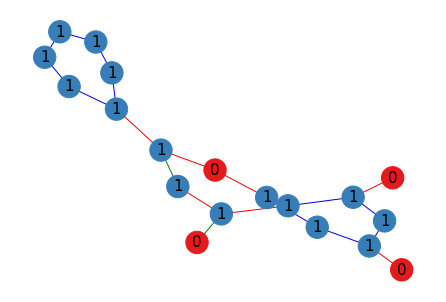

Index: 449 Label: 1


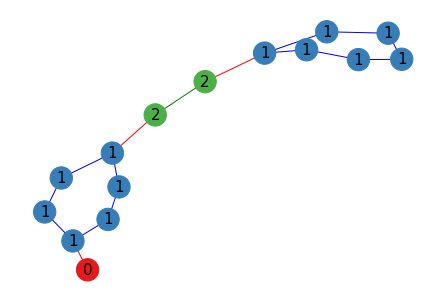

Index: 539 Label: 1


Index: 566 Label: 1


Index: 585 Label: 1


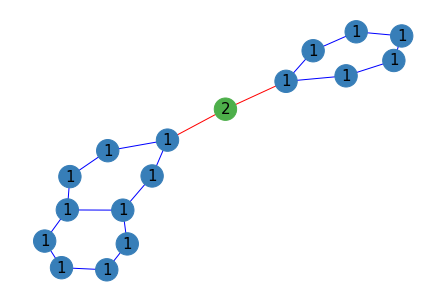

Index: 592 Label: 1


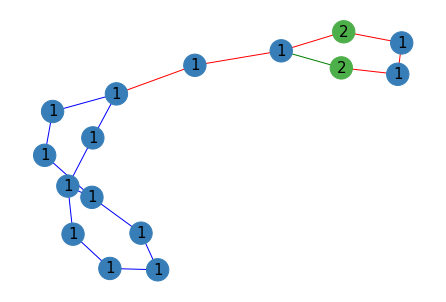

Index: 668 Label: 1


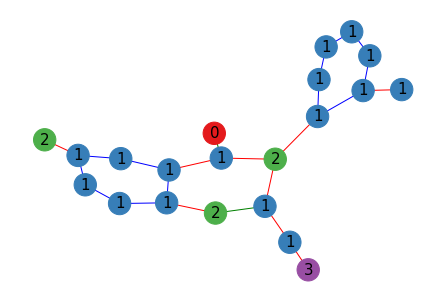

Index: 685 Label: 1


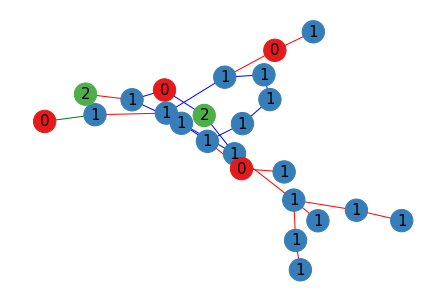

Index: 705 Label: 1


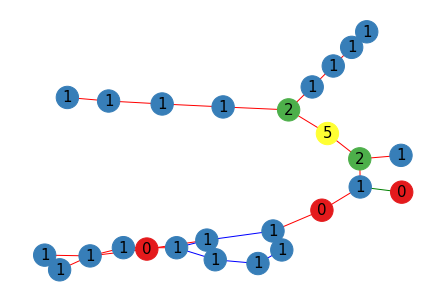

Index: 718 Label: 1


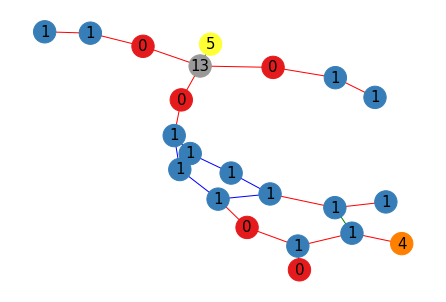

Index: 735 Label: 1


Index: 763 Label: 1


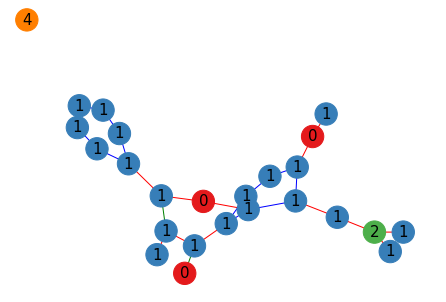

Index: 815 Label: 1


Index: 850 Label: 1


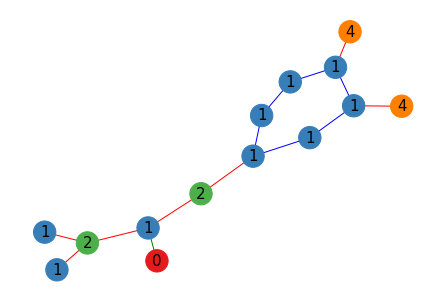

Index: 890 Label: 1


Index: 913 Label: 1


Index: 919 Label: 1


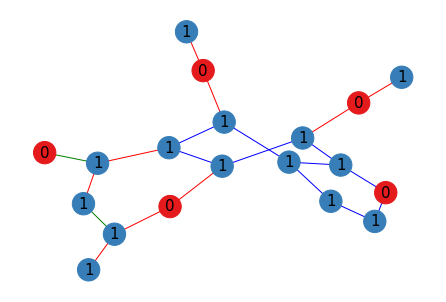

Index: 924 Label: 1


Index: 939 Label: 1


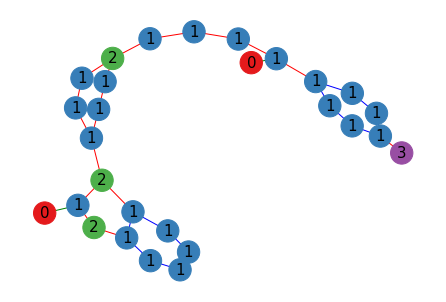

Index: 940 Label: 1


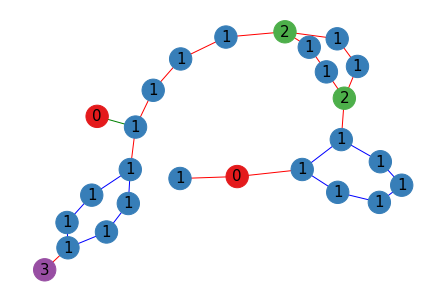

In [5]:
for i in range(1000):
    if training_labels[i] == 1:
        print("Index:", i, "Label:", training_labels[i])
        training_data[i].plot()